In [372]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error

In [373]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


In [374]:
data_ = data.copy()

In [375]:
data_

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575


In [376]:
len(data)-15

207

In [377]:
data_test = data[-15:]
data = data[:-15]

In [378]:
data_test

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2018-04-01,10.683206,10729.977,1283.415,6102.877
2018-05-01,10.129211,10941.294,1233.178,5962.504
2018-06-01,11.071347,10720.946,1334.725,6101.948
2018-07-01,10.125100,10959.197,1234.638,5984.340
2018-08-01,10.085244,10756.782,1206.529,6235.352
2018-09-01,10.476567,10984.928,1285.522,5948.622
2018-10-01,10.230811,10874.338,1239.326,6125.791
2018-11-01,9.844539,10783.299,1177.484,6298.992
2018-12-01,10.725865,10835.398,1301.822,6142.856


In [379]:
data_test_plt = data_test["Ocupados"]
x_plt = np.linspace(207, 207 + data_test.shape[0] - 1, data_test.shape[0])
x_plt

array([207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
       218., 219., 220., 221.])

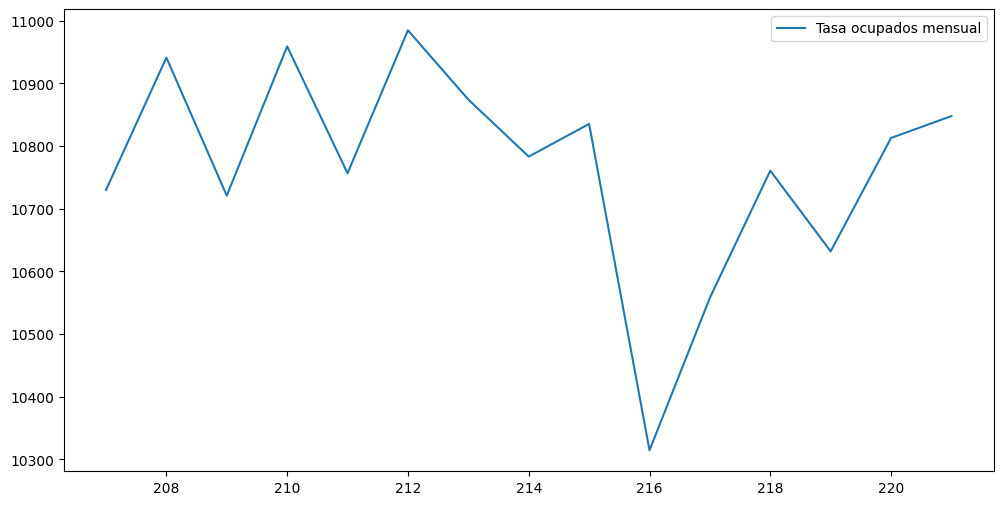

In [380]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x_plt, data_test_plt.values,label="Tasa ocupados mensual")
plt.legend()
plt.show()

### **6. Tendencia Lineal**

In [381]:
y = data["Ocupados"]
x = np.linspace(1,data.shape[0],data.shape[0])
X = sm.add_constant(x)
lin = sm.OLS(y,X)
lin_t_lineal = lin.fit()
print(lin_t_lineal.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     5373.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          4.94e-149
Time:                        04:44:18   Log-Likelihood:                -1429.6
No. Observations:                 207   AIC:                             2863.
Df Residuals:                     205   BIC:                             2870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6891.0496     33.881    203.390      0.0

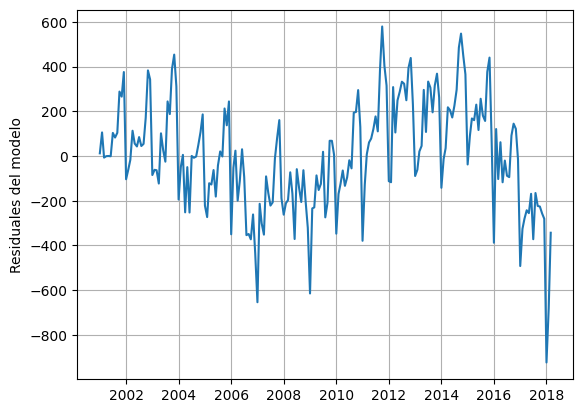

In [382]:
plt.ylabel("Residuales del modelo")
plt.plot(lin_t_lineal.resid)
plt.grid()

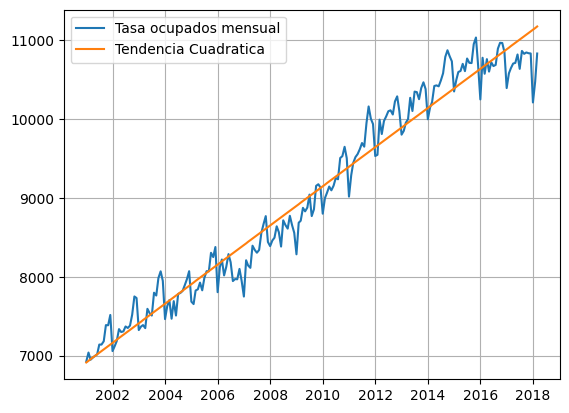

In [383]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(lin_t_lineal.fittedvalues,label="Tendencia Cuadratica")
plt.legend()
plt.grid()
plt.show()

In [384]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(x_for)


In [385]:
dt = lin_t_lineal.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

    Point_forecast      lower_95      upper_95
0     11197.808630  10714.371178  11681.246082
1     11218.514202  10735.009710  11702.018694
2     11239.219774  10755.647610  11722.791939
3     11259.925346  10776.284878  11743.565815
4     11280.630919  10796.921515  11764.340323
5     11301.336491  10817.557520  11785.115462
6     11322.042063  10838.192894  11805.891232
7     11342.747635  10858.827638  11826.667633
8     11363.453207  10879.461751  11847.444664
9     11384.158780  10900.095233  11868.222326
10    11404.864352  10920.728086  11889.000617
11    11425.569924  10941.360310  11909.779539
12    11446.275496  10961.991903  11930.559089
13    11466.981068  10982.622868  11951.339269
14    11487.686641  11003.253204  11972.120077


In [386]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

612.3735947035314


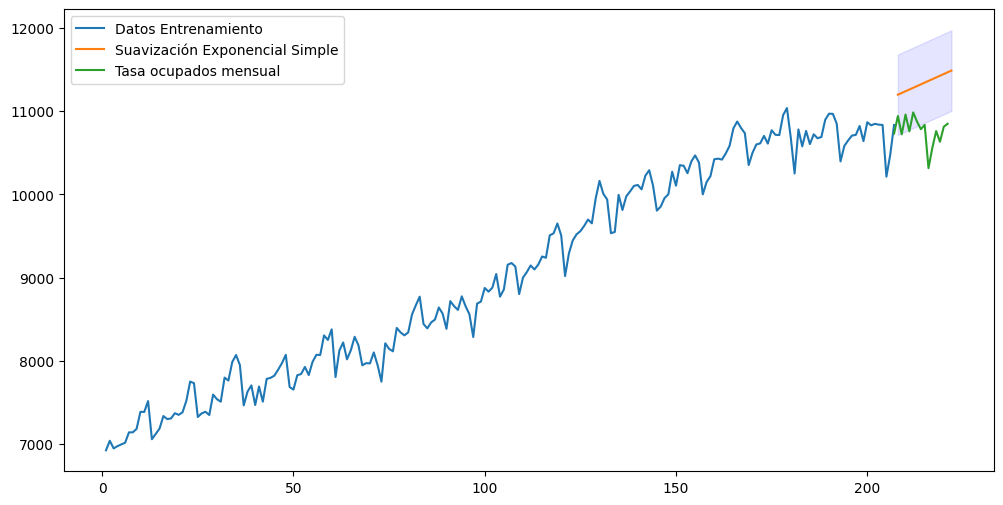

In [387]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Suavización Exponencial Simple")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(x_plt, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()


### **7. Tendencia Cuadratica**

In [388]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
X = sm.add_constant(data[["x","x2"]])
pol = sm.OLS(y,X)
pol_2 = pol.fit()
print(pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     2674.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          4.41e-147
Time:                        04:44:19   Log-Likelihood:                -1429.6
No. Observations:                 207   AIC:                             2865.
Df Residuals:                     204   BIC:                             2875.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6881.6492     51.248    134.281      0.0

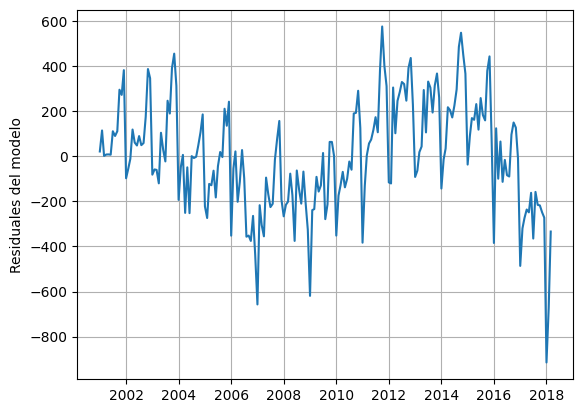

In [389]:
plt.ylabel("Residuales del modelo")
plt.plot(pol_2.resid)
plt.grid()

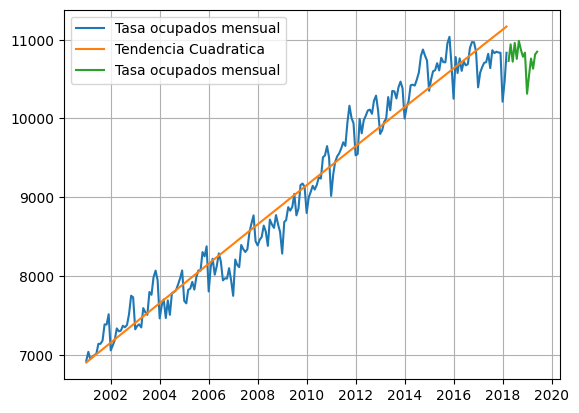

In [390]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(pol_2.fittedvalues,label="Tendencia Cuadratica")
plt.plot(data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.grid()
plt.show()

In [391]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
X_for= sm.add_constant(np.stack((x_for, x_for**2), axis=1))

In [392]:
dt = pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
print(preds)

    Point_forecast      lower_95      upper_95
0     11188.408260  10697.970775  11678.845745
1     11208.842667  10717.997259  11699.688076
2     11229.274480  10738.007748  11720.541213
3     11249.703698  10758.001996  11741.405400
4     11270.130321  10777.979756  11762.280887
5     11290.554349  10797.940780  11783.167919
6     11310.975783  10817.884819  11804.066746
7     11331.394621  10837.811626  11824.977616
8     11351.810865  10857.720951  11845.900779
9     11372.224513  10877.612544  11866.836483
10    11392.635567  10897.486157  11887.784977
11    11413.044026  10917.341539  11908.746513
12    11433.449890  10937.178441  11929.721340
13    11453.853159  10956.996612  11950.709706
14    11474.253834  10976.795804  11971.711863


In [393]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

601.4147610641064


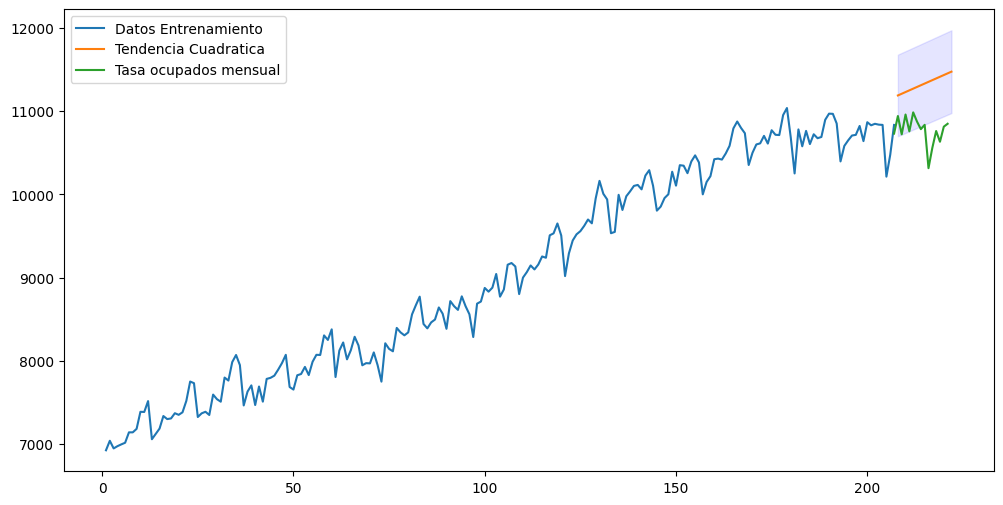

In [394]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x,y,label="Datos Entrenamiento")
plt.plot(x_for,preds['Point_forecast'],label="Tendencia Cuadratica")
plt.fill_between(x_for ,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(x_plt, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

### **8. Estimación de la Estacionalidad**

In [395]:
month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,False,False,False,False,False,False,False,False,False,False,False
2001-02-01,True,False,False,False,False,False,False,False,False,False,False
2001-03-01,False,True,False,False,False,False,False,False,False,False,False
2001-04-01,False,False,True,False,False,False,False,False,False,False,False
2001-05-01,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,False,False,False,False,False,False,False,False,False,True,False
2017-12-01,False,False,False,False,False,False,False,False,False,False,True
2018-01-01,False,False,False,False,False,False,False,False,False,False,False


In [396]:
y = data["Ocupados"]
X = sm.add_constant(month_dummies.astype(int))
sea = sm.OLS(y,X)
season = sea.fit()
print(season.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.2894
Date:                Sat, 08 Nov 2025   Prob (F-statistic):              0.987
Time:                        04:44:20   Log-Likelihood:                -1769.9
No. Observations:                 207   AIC:                             3564.
Df Residuals:                     195   BIC:                             3604.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8724.5387    303.674     28.730      0.0

In [397]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,False,False,False,False,False,False,False,False,False,False,False
2001-02-01,True,False,False,False,False,False,False,False,False,False,False
2001-03-01,False,True,False,False,False,False,False,False,False,False,False
2001-04-01,False,False,True,False,False,False,False,False,False,False,False
2001-05-01,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,False,False,False,False,False,False,False,False,False,True,False
2017-12-01,False,False,False,False,False,False,False,False,False,False,True
2018-01-01,False,False,False,False,False,False,False,False,False,False,False


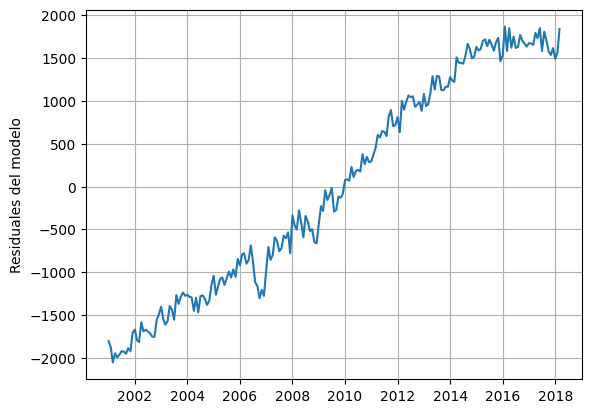

In [398]:
plt.ylabel("Residuales del modelo")
plt.plot(season.resid)
plt.grid()

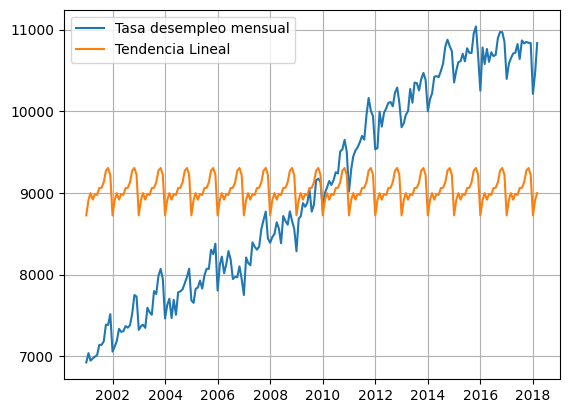

In [399]:
plt.plot(y,label="Tasa desempleo mensual")
plt.plot(season.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [400]:
range_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=15,freq='MS')

x_for = pd.get_dummies(range_dates.month,drop_first=True)
X_for= sm.add_constant(x_for)

In [401]:
dt = season.get_prediction(X_for.astype(int)).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast     lower_95      upper_95
2018-04-01     8916.958471  6302.345430  11531.571511
2018-05-01     8986.488706  6371.875665  11601.101746
2018-06-01     8974.779765  6360.166724  11589.392805
2018-07-01     9059.390353  6444.777312  11674.003393
2018-08-01     9062.507118  6447.894077  11677.120158
2018-09-01     9129.933235  6515.320195  11744.546276
2018-10-01     9270.852412  6656.239371  11885.465452
2018-11-01     9304.549471  6689.936430  11919.162511
2018-12-01     9220.622941  6606.009901  11835.235982
2019-01-01     8724.538722  6113.963697  11335.113748
2019-02-01     8914.544389  6303.969363  11525.119415
2019-03-01     8997.218333  6386.643308  11607.793359
2019-04-01     8916.958471  6302.345430  11531.571511
2019-05-01     8986.488706  6371.875665  11601.101746
2019-06-01     8974.779765  6360.166724  11589.392805


In [402]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

1742.9620254941483


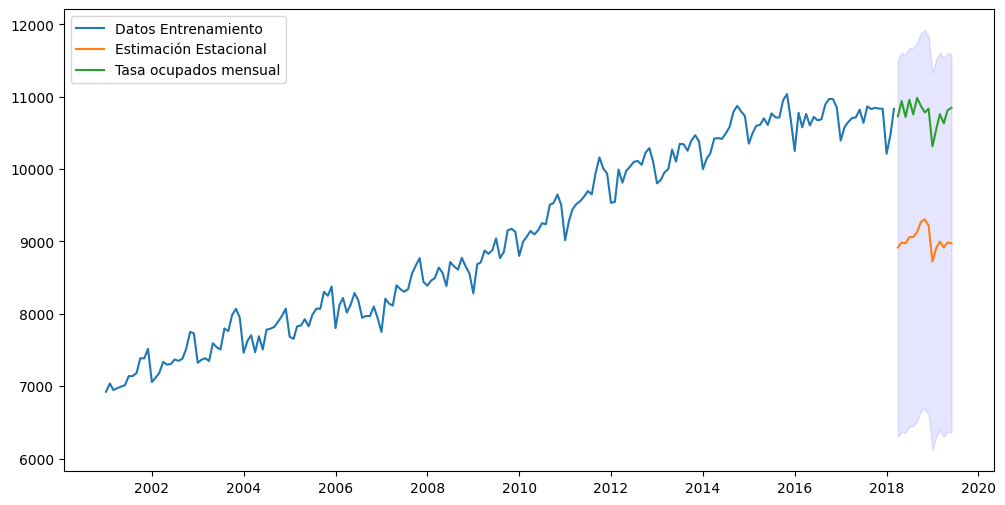

In [403]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

### **9. Tendencia + Estacionalidad**

In [404]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)

In [405]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,0,0,0,0,0,0,0,0,0,1,0
2017-12-01,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0,0,0,0,0,0,0,0,0,0,0


In [406]:

X = sm.add_constant( pd.concat([data[["x","x2"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     556.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          3.08e-145
Time:                        04:44:21   Log-Likelihood:                -1393.8
No. Observations:                 207   AIC:                             2816.
Df Residuals:                     193   BIC:                             2862.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6599.4083     64.111    102.936      0.0

In [407]:
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,0,0,0,0,0,0,0,0,0,1,0
2017-12-01,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0,0,0,0,0,0,0,0,0,0,0


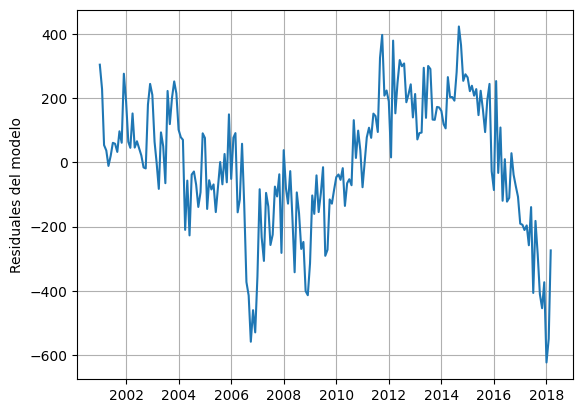

In [408]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

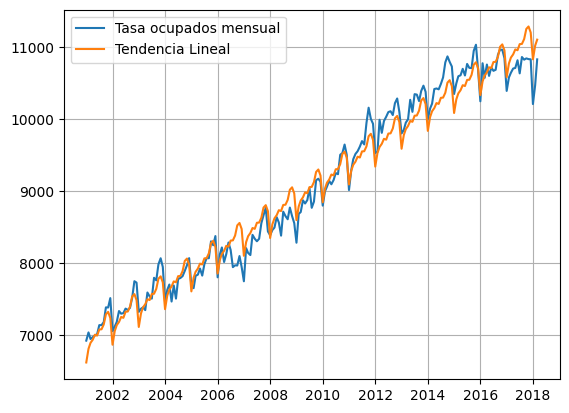

In [409]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [410]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2),axis=1),columns=["x","x2"] )

range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
print(range_dates)
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', freq='MS')


,const,x,x2,2,3,4,5,6,7,8,9,10,11,12
0,1.0,208.0,43264.0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,209.0,43681.0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,210.0,44100.0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,211.0,44521.0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,212.0,44944.0,0,0,0,0,0,0,1,0,0,0,0
5,1.0,213.0,45369.0,0,0,0,0,0,0,0,1,0,0,0
6,1.0,214.0,45796.0,0,0,0,0,0,0,0,0,1,0,0
7,1.0,215.0,46225.0,0,0,0,0,0,0,0,0,0,1,0
8,1.0,216.0,46656.0,0,0,0,0,0,0,0,0,0,0,1
9,1.0,217.0,47089.0,0,0,0,0,0,0,0,0,0,0,0


In [411]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2018-04-01    11151.976573  10716.601040  11587.352106
2018-05-01    11221.606180  10785.928076  11657.284285
2018-06-01    11209.996612  10774.007385  11645.985838
2018-07-01    11294.706572  10858.397691  11731.015454
2018-08-01    11297.922709  10861.285659  11734.559760
2018-09-01    11365.448199  10928.474485  11802.421913
2018-10-01    11506.466748  11069.147895  11943.785601
2018-11-01    11540.263179  11102.590732  11977.935626
2018-12-01    11456.436022  11018.401546  11894.470498
2019-01-01    11084.248962  10646.804809  11521.693115
2019-02-01    11274.359522  10836.531246  11712.187797
2019-03-01    11357.138359  10918.916586  11795.360132
2019-04-01    11401.151062  10960.769828  11841.532295
2019-05-01    11470.791711  11029.959899  11911.623522
2019-06-01    11459.193183  11017.900568  11900.485798


In [412]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

592.3759257439333


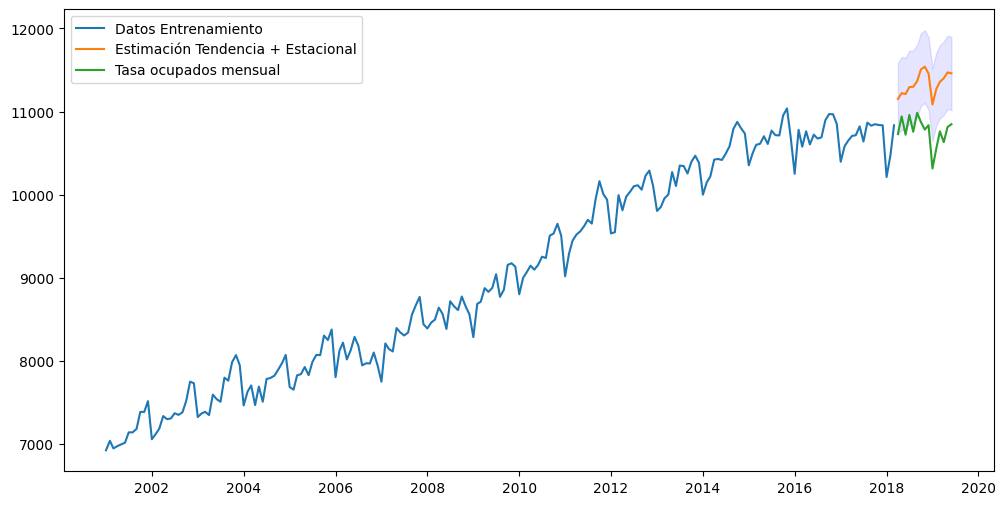

In [413]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

# **Polinomio 3**


In [414]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
data["x3"] = x**3

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,0,0,0,0,0,0,0,0,0,1,0
2017-12-01,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0,0,0,0,0,0,0,0,0,0,0


In [415]:
X = sm.add_constant( pd.concat([data[["x","x2","x3"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     988.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.56e-170
Time:                        04:44:22   Log-Likelihood:                -1327.5
No. Observations:                 207   AIC:                             2685.
Df Residuals:                     192   BIC:                             2735.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6976.7603     54.802    127.308      0.0

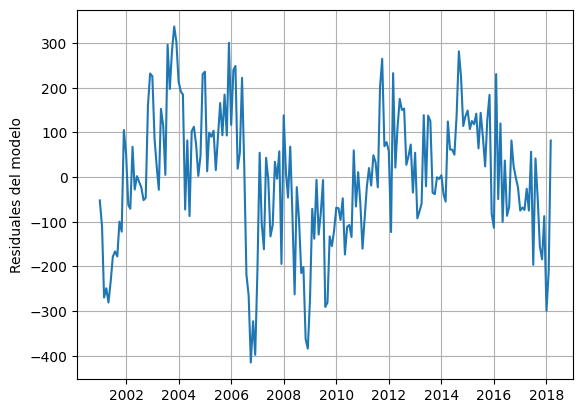

In [416]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

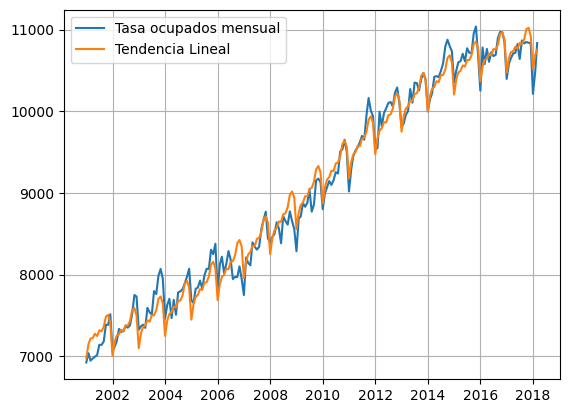

In [417]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [418]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3),axis=1),columns=["x","x2","x3"] )

range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,2,3,4,5,6,7,8,9,10,11,12
0,1.0,208.0,43264.0,8998912.0,0,0,1,0,0,0,0,0,0,0,0
1,1.0,209.0,43681.0,9129329.0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,210.0,44100.0,9261000.0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,211.0,44521.0,9393931.0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,212.0,44944.0,9528128.0,0,0,0,0,0,0,1,0,0,0,0
5,1.0,213.0,45369.0,9663597.0,0,0,0,0,0,0,0,1,0,0,0
6,1.0,214.0,45796.0,9800344.0,0,0,0,0,0,0,0,0,1,0,0
7,1.0,215.0,46225.0,9938375.0,0,0,0,0,0,0,0,0,0,1,0
8,1.0,216.0,46656.0,10077696.0,0,0,0,0,0,0,0,0,0,0,1
9,1.0,217.0,47089.0,10218313.0,0,0,0,0,0,0,0,0,0,0,0


In [419]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2018-04-01    10757.037613  10434.655258  11079.419967
2018-05-01    10807.996826  10484.870358  11131.123293
2018-06-01    10777.175691  10453.259970  11101.091412
2018-07-01    10842.132915  10517.380962  11166.884868
2018-08-01    10825.055144  10499.418119  11150.692170
2018-09-01    10871.745556  10545.172739  11198.318374
2018-10-01    10991.387856  10663.826630  11318.949081
2018-11-01    11003.266867  10674.662709  11331.871025
2018-12-01    10896.981119  10567.277585  11226.684652
2019-01-01    10480.860422  10149.826098  10811.894747
2019-02-01    10648.407163  10316.160428  10980.653899
2019-03-01    10708.050946  10374.529907  11041.571986
2019-04-01    10706.416305  10369.331984  11043.500626
2019-05-01    10750.742184  10412.150211  11089.334156
2019-06-01    10713.227585  10373.055023  11053.400147


In [420]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

111.04196632854133


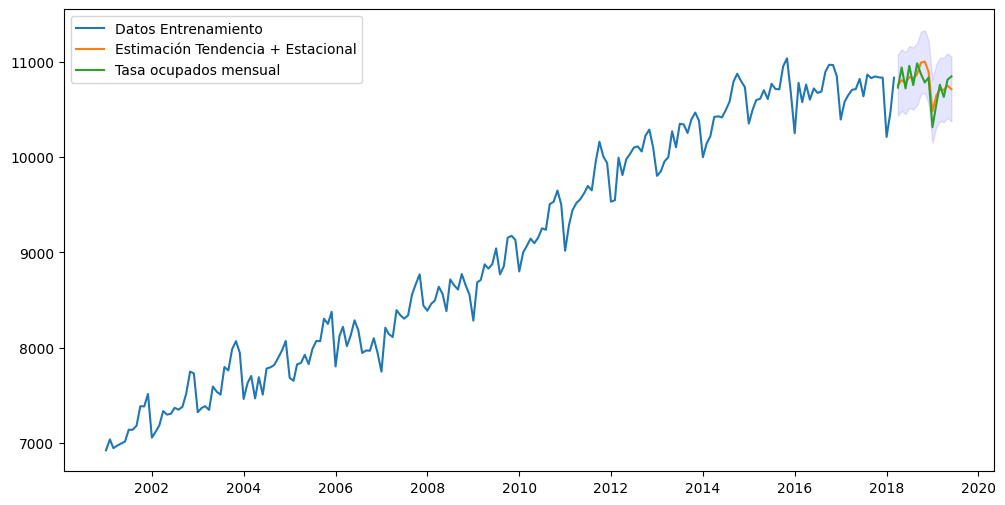

In [421]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

# **Polinomio 4**

In [422]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
data["x3"] = x**3
data["x4"] = x**4

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)


In [423]:
X = sm.add_constant( pd.concat([data[["x","x2","x3","x4"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          6.49e-187
Time:                        04:44:23   Log-Likelihood:                -1282.8
No. Observations:                 207   AIC:                             2598.
Df Residuals:                     191   BIC:                             2651.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6711.9705     51.391    130.605      0.0

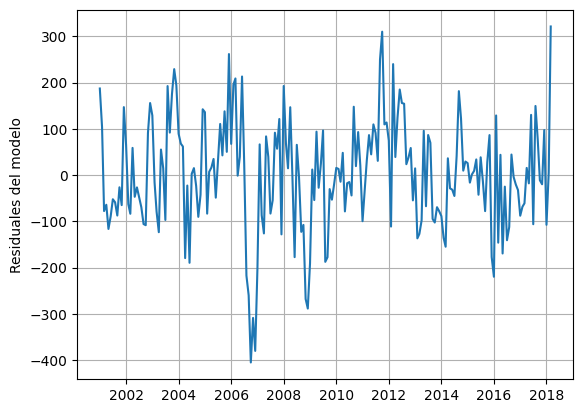

In [424]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

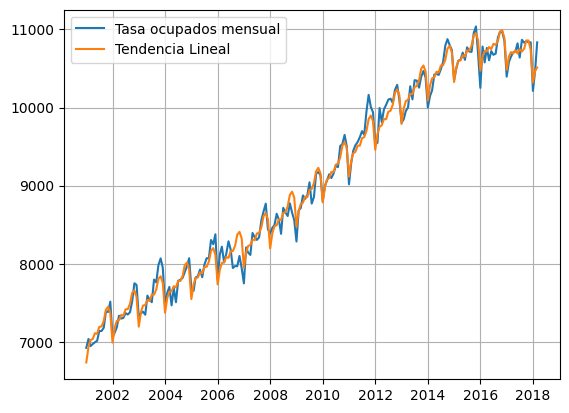

In [425]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [426]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4),axis=1),columns=["x","x2","x3","x4"] )

range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,x4,2,3,4,5,6,7,8,9,10,11,12
0,1.0,208.0,43264.0,8998912.0,1.871774e+09,0,0,1,0,0,0,0,0,0,0,0
1,1.0,209.0,43681.0,9129329.0,1.908030e+09,0,0,0,1,0,0,0,0,0,0,0
2,1.0,210.0,44100.0,9261000.0,1.944810e+09,0,0,0,0,1,0,0,0,0,0,0
3,1.0,211.0,44521.0,9393931.0,1.982119e+09,0,0,0,0,0,1,0,0,0,0,0
4,1.0,212.0,44944.0,9528128.0,2.019963e+09,0,0,0,0,0,0,1,0,0,0,0
5,1.0,213.0,45369.0,9663597.0,2.058346e+09,0,0,0,0,0,0,0,1,0,0,0
6,1.0,214.0,45796.0,9800344.0,2.097274e+09,0,0,0,0,0,0,0,0,1,0,0
7,1.0,215.0,46225.0,9938375.0,2.136751e+09,0,0,0,0,0,0,0,0,0,1,0
8,1.0,216.0,46656.0,10077696.0,2.176782e+09,0,0,0,0,0,0,0,0,0,0,1
9,1.0,217.0,47089.0,10218313.0,2.217374e+09,0,0,0,0,0,0,0,0,0,0,0


In [427]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2018-04-01    10477.120598  10211.004615  10743.236582
2018-05-01    10500.714257  10232.874979  10768.553536
2018-06-01    10441.618101  10171.882309  10711.353894
2018-07-01    10477.364851  10205.549231  10749.180472
2018-08-01    10430.115170  10156.026155  10704.204185
2018-09-01    10445.646249  10169.079901  10722.212596
2018-10-01    10533.115808  10253.857747  10812.373870
2018-11-01    10511.782688  10229.608062  10793.957314
2018-12-01    10371.219432  10085.892941  10656.545924
2019-01-01     9933.809581   9645.977304  10221.641859
2019-02-01    10063.446520   9771.912098  10354.980943
2019-03-01    10084.083366   9788.573266  10379.593466
2019-04-01    10026.766283   9724.067832  10329.464735
2019-05-01    10028.288360   9720.787455  10335.789265
2019-06-01     9946.740012   9634.118757  10259.361267


In [428]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

517.240128772961


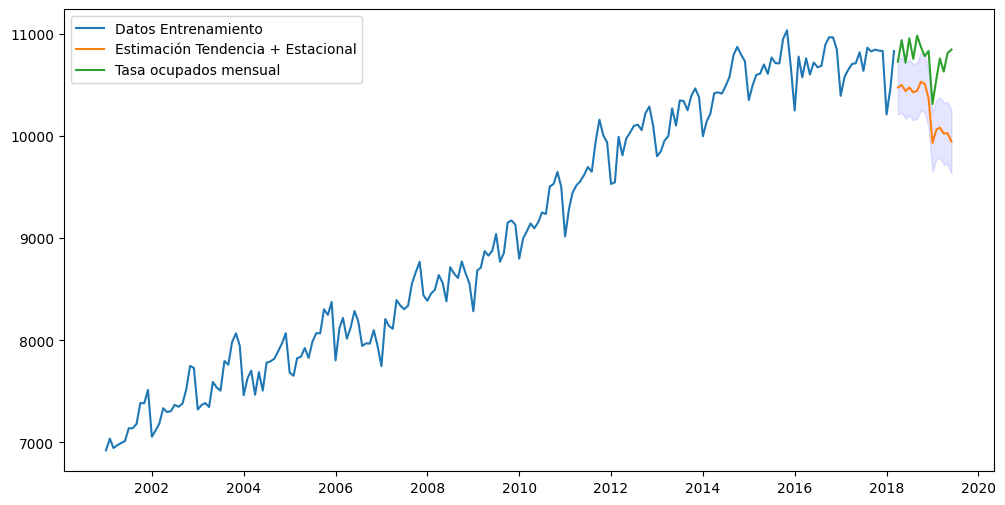

In [429]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

# **Polinomio 5**


In [430]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
data["x3"] = x**3
data["x4"] = x**4
data["x5"] = x**5

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,0,0,0,0,0,0,0,0,0,1,0
2017-12-01,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0,0,0,0,0,0,0,0,0,0,0


In [431]:
X = sm.add_constant( pd.concat([data[["x","x2","x3","x4","x5"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          2.01e-187
Time:                        04:44:23   Log-Likelihood:                -1277.5
No. Observations:                 207   AIC:                             2589.
Df Residuals:                     190   BIC:                             2646.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6618.5302     58.358    113.413      0.0

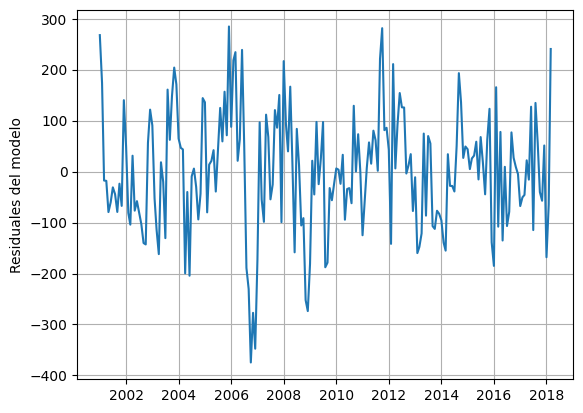

In [432]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

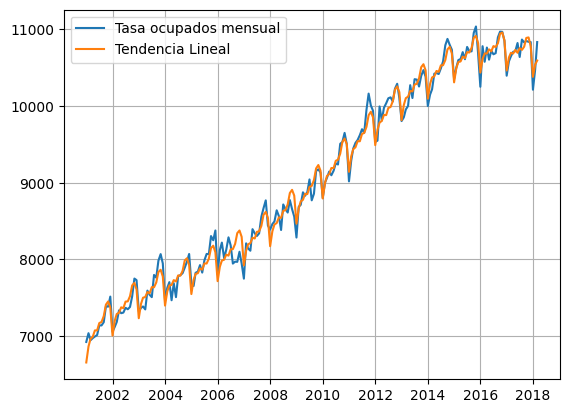

In [433]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [434]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5),axis=1),columns=["x","x2","x3","x4","x5"] )

range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,x4,x5,2,3,4,5,6,7,8,9,10,11,12
0,1.0,208.0,43264.0,8998912.0,1.871774e+09,3.893289e+11,0,0,1,0,0,0,0,0,0,0,0
1,1.0,209.0,43681.0,9129329.0,1.908030e+09,3.987782e+11,0,0,0,1,0,0,0,0,0,0,0
2,1.0,210.0,44100.0,9261000.0,1.944810e+09,4.084101e+11,0,0,0,0,1,0,0,0,0,0,0
3,1.0,211.0,44521.0,9393931.0,1.982119e+09,4.182272e+11,0,0,0,0,0,1,0,0,0,0,0
4,1.0,212.0,44944.0,9528128.0,2.019963e+09,4.282322e+11,0,0,0,0,0,0,1,0,0,0,0
5,1.0,213.0,45369.0,9663597.0,2.058346e+09,4.384277e+11,0,0,0,0,0,0,0,1,0,0,0
6,1.0,214.0,45796.0,9800344.0,2.097274e+09,4.488166e+11,0,0,0,0,0,0,0,0,1,0,0
7,1.0,215.0,46225.0,9938375.0,2.136751e+09,4.594014e+11,0,0,0,0,0,0,0,0,0,1,0
8,1.0,216.0,46656.0,10077696.0,2.176782e+09,4.701850e+11,0,0,0,0,0,0,0,0,0,0,1
9,1.0,217.0,47089.0,10218313.0,2.217374e+09,4.811701e+11,0,0,0,0,0,0,0,0,0,0,0


In [435]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2018-04-01    10574.566339  10307.350673  10841.782004
2018-05-01    10611.113393  10340.296018  10881.930768
2018-06-01    10565.907690  10290.956802  10840.858579
2018-07-01    10616.508779  10336.843271  10896.174286
2018-08-01    10585.104904  10300.094106  10870.115701
2018-09-01    10617.501596  10326.465590  10908.537602
2018-10-01    10722.885672  10425.096179  11020.675164
2018-11-01    10720.545819  10415.227618  11025.864020
2018-12-01    10600.085190  10286.417985  10913.752395
2019-01-01    10188.664403   9865.087689  10512.241117
2019-02-01    10340.097682  10006.472193  10673.723170
2019-03-01    10383.784418  10039.170218  10728.398617
2019-04-01    10356.217849   9995.348732  10717.086965
2019-05-01    10384.114294  10009.771993  10758.456595
2019-06-01    10330.345237   9941.447337  10719.243138


In [436]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

289.22130227105475


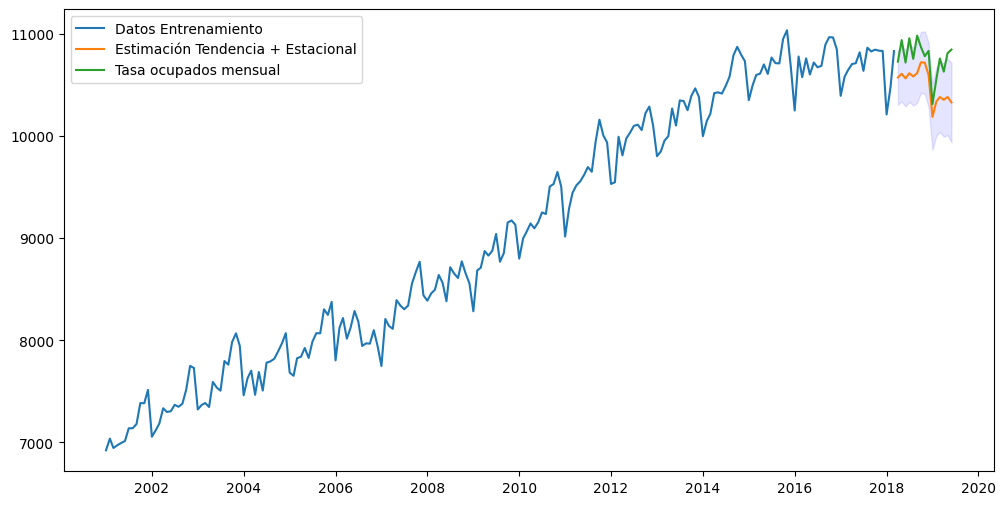

In [437]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

# **Polinomio 6**


In [438]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = x**2
data["x3"] = x**3
data["x4"] = x**4
data["x5"] = x**5
data["x6"] = x**6

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-11-01,0,0,0,0,0,0,0,0,0,1,0
2017-12-01,0,0,0,0,0,0,0,0,0,0,1
2018-01-01,0,0,0,0,0,0,0,0,0,0,0


In [439]:
X = sm.add_constant( pd.concat([data[["x","x2","x3","x4","x5","x6"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1432.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.55e-188
Time:                        04:44:24   Log-Likelihood:                -1274.7
No. Observations:                 207   AIC:                             2583.
Df Residuals:                     190   BIC:                             2640.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6693.4483     65.885    101.593      0.0

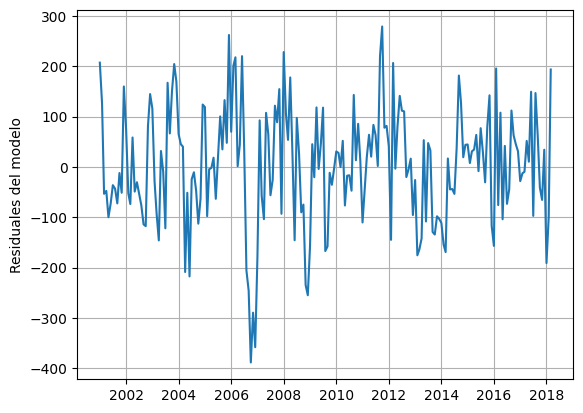

In [440]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

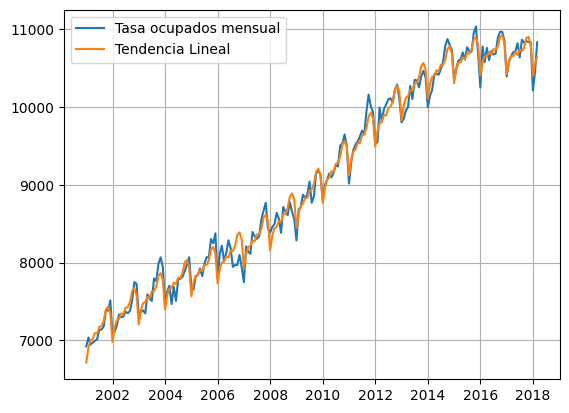

In [441]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [442]:
h=15
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5, x_for**6),axis=1),columns=["x","x2","x3","x4","x5","x6"] )

range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')
x_for_dummies = pd.get_dummies(range_dates.month,drop_first=True)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,x4,x5,x6,2,3,4,5,6,7,8,9,10,11,12
0,1.0,208.0,43264.0,8998912.0,1.871774e+09,3.893289e+11,8.098042e+13,0,0,1,0,0,0,0,0,0,0,0
1,1.0,209.0,43681.0,9129329.0,1.908030e+09,3.987782e+11,8.334465e+13,0,0,0,1,0,0,0,0,0,0,0
2,1.0,210.0,44100.0,9261000.0,1.944810e+09,4.084101e+11,8.576612e+13,0,0,0,0,1,0,0,0,0,0,0
3,1.0,211.0,44521.0,9393931.0,1.982119e+09,4.182272e+11,8.824594e+13,0,0,0,0,0,1,0,0,0,0,0
4,1.0,212.0,44944.0,9528128.0,2.019963e+09,4.282322e+11,9.078522e+13,0,0,0,0,0,0,1,0,0,0,0
5,1.0,213.0,45369.0,9663597.0,2.058346e+09,4.384277e+11,9.338511e+13,0,0,0,0,0,0,0,1,0,0,0
6,1.0,214.0,45796.0,9800344.0,2.097274e+09,4.488166e+11,9.604674e+13,0,0,0,0,0,0,0,0,1,0,0
7,1.0,215.0,46225.0,9938375.0,2.136751e+09,4.594014e+11,9.877130e+13,0,0,0,0,0,0,0,0,0,1,0
8,1.0,216.0,46656.0,10077696.0,2.176782e+09,4.701850e+11,1.015600e+14,0,0,0,0,0,0,0,0,0,0,1
9,1.0,217.0,47089.0,10218313.0,2.217374e+09,4.811701e+11,1.044139e+14,0,0,0,0,0,0,0,0,0,0,0


In [443]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2018-04-01    10639.559641  10367.547626  10911.571655
2018-05-01    10691.794616  10412.700356  10970.888876
2018-06-01    10663.644847  10376.066244  10951.223450
2018-07-01    10732.757011  10435.142612  11030.371410
2018-08-01    10721.408779  10412.062262  11030.755297
2018-09-01    10775.497470  10452.584767  11098.410173
2018-10-01    10904.304112  10565.862373  11242.745850
2018-11-01    10927.214098  10571.161569  11283.266627
2018-12-01    10833.929836  10458.075733  11209.783939
2019-01-01    10448.157852  10051.471457  10844.844247
2019-02-01    10631.683829  10210.267441  11053.100218
2019-03-01    10709.640801  10261.025707  11158.255895
2019-04-01    10723.014638  10239.015428  11207.013849
2019-05-01    10790.776611  10273.515865  11308.037358
2019-06-01    10779.478977  10226.168652  11332.789302


In [444]:
rmse = np.sqrt(mean_squared_error(data_test_plt,preds['Point_forecast']))
print(rmse)

124.12701917643206


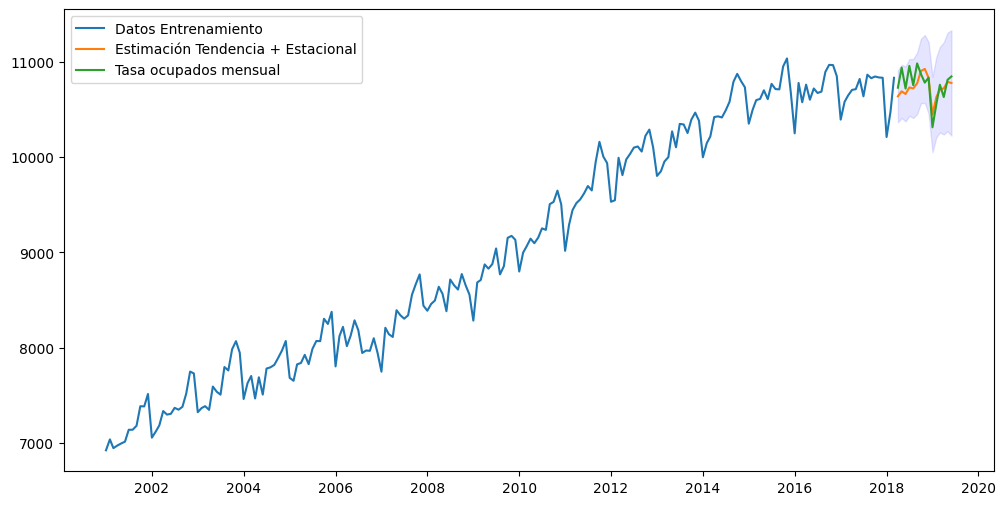

In [445]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Entrenamiento")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.plot(data_test_plt.index, data_test_plt,label="Tasa ocupados mensual")
plt.legend()
plt.show()

# **Solucion**

In [446]:
data_

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575


In [447]:
data = data_.copy()

In [448]:
data

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911
...,...,...,...,...
2019-02-01,12.427409,10557.917,1498.272,6264.403
2019-03-01,11.975098,10760.776,1463.919,6116.140
2019-04-01,11.144286,10632.028,1333.469,6395.575


In [449]:
data.shape[0]

222

In [450]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = data["x"]**2
data["x3"] = data["x"]**3

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,1,0,0,0,0,0,0,0,0,0,0
2019-03-01,0,1,0,0,0,0,0,0,0,0,0
2019-04-01,0,0,1,0,0,0,0,0,0,0,0


In [451]:
X = sm.add_constant( pd.concat([data[["x","x2","x3"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1158.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          4.96e-188
Time:                        04:44:25   Log-Likelihood:                -1420.0
No. Observations:                 222   AIC:                             2870.
Df Residuals:                     207   BIC:                             2921.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6971.9175     51.941    134.228      0.0

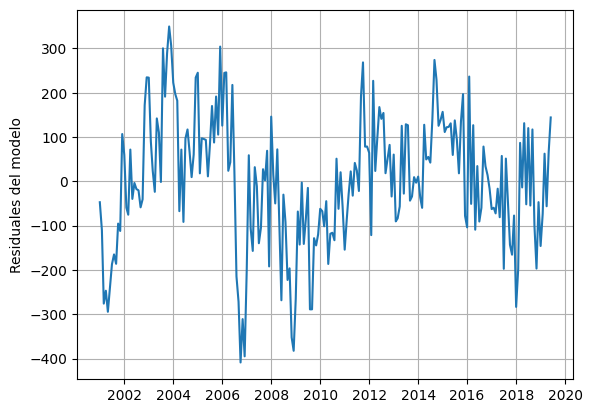

In [452]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

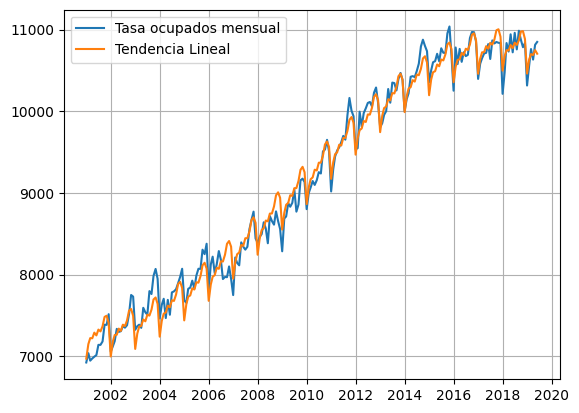

In [453]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [454]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3),axis=1),columns=["x","x2","x3"] )
range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')

x_for_dummies = pd.get_dummies(range_dates.month).astype(int)
x_for_dummies = x_for_dummies.reindex(columns=range(2, 13), fill_value=0)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,2,3,4,5,6,7,8,9,10,11,12
0,1.0,223.0,49729.0,11089567.0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,224.0,50176.0,11239424.0,0,0,0,0,0,0,1,0,0,0,0
2,1.0,225.0,50625.0,11390625.0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,226.0,51076.0,11543176.0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,227.0,51529.0,11697083.0,0,0,0,0,0,0,0,0,0,1,0
5,1.0,228.0,51984.0,11852352.0,0,0,0,0,0,0,0,0,0,0,1


In [455]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-07-01    10763.275206  10448.449204  11078.101208
2019-08-01    10728.681154  10413.222837  11044.139471
2019-09-01    10778.165572  10462.039018  11094.292126
2019-10-01    10877.663237  10560.831152  11194.495323
2019-11-01    10876.403539  10558.827237  11193.979842
2019-12-01    10771.428811  10453.068202  11089.789419


In [456]:
preds

,Point_forecast,lower_95,upper_95
2019-07-01,10763.275206,10448.449204,11078.101208
2019-08-01,10728.681154,10413.222837,11044.139471
2019-09-01,10778.165572,10462.039018,11094.292126
2019-10-01,10877.663237,10560.831152,11194.495323
2019-11-01,10876.403539,10558.827237,11193.979842
2019-12-01,10771.428811,10453.068202,11089.789419


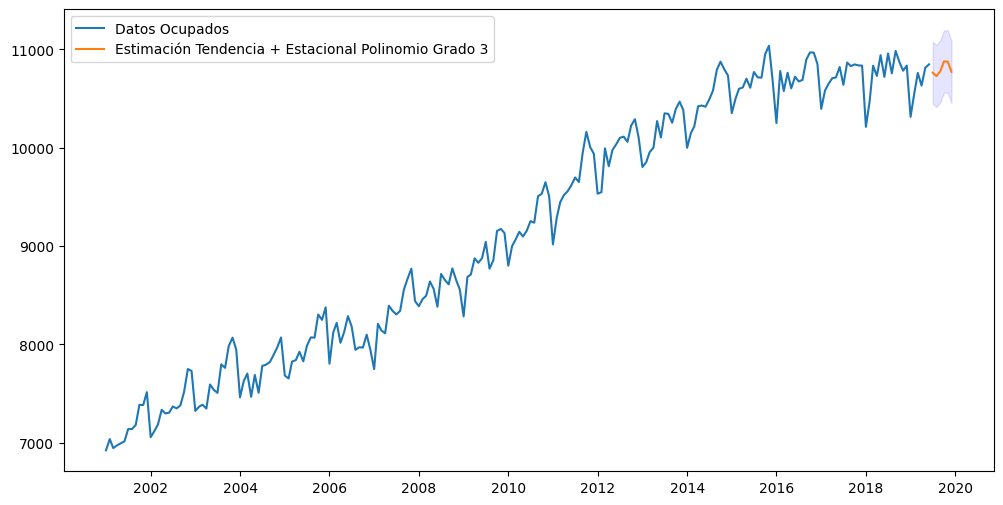

In [457]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Ocupados")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional Polinomio Grado 3")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

**Ruido blanco**

In [458]:
season_pol_2.resid

,0
mes,
2001-01-01,-47.211267
2001-02-01,-110.263252
2001-03-01,-275.957424
2001-04-01,-246.931046
2001-05-01,-294.423327
...,...
2019-02-01,-73.663960
2019-03-01,62.365315
2019-04-01,-56.275329


In [459]:
signo = season_pol_2.resid>0
runstest_1samp(signo, correction=False)

(np.float64(-5.3806640999852045), np.float64(7.421155420013244e-08))

In [460]:
# prueba de Box-Pierce y la modificación de Ljung-Box
sm.stats.acorr_ljungbox(data.Ocupados, lags=[1], return_df=True,boxpierce=True ) # Se puede hacer para un solo lag.

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,215.466151,8.818153e-49,212.580444,3.757527e-48


In [461]:
Resul_lb_bp = sm.stats.acorr_ljungbox(data.Ocupados, lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,215.466151,8.818153e-49,212.580444,3.757527e-48,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,425.045838,5.040446e-93,418.417636,1.386005e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,629.973395,3.201138e-136,618.770917,8.590288e-134,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,830.534686,1.866623e-178,813.960031,7.268819e-175,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,1028.006530,5.191558e-220,1005.260880,4.364213e-215,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,1222.035167,8.145806e-261,1192.359923,2.155332e-254,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
7,1412.841689,6.426069e-301,1375.500111,7.718370e-293,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
8,1599.512253,0.000000e+00,1553.837168,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
9,1782.749605,0.000000e+00,1728.076257,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
10,1963.258217,0.000000e+00,1898.914764,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr


**Solucion 2**

In [462]:
y = data["Ocupados"]
data["x"] = np.linspace(1,data.shape[0],data.shape[0])
data["x2"] = data["x"]**2
data["x3"] = data["x"]**3
data["x4"] = data["x"]**4
data["x5"] = data["x"]**5
data["x6"] = data["x"]**6

month_dummies = pd.get_dummies(data.index.month,drop_first=True).set_index(data.index).astype(int)
month_dummies

,2,3,4,5,6,7,8,9,10,11,12
mes,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,0
2001-02-01,1,0,0,0,0,0,0,0,0,0,0
2001-03-01,0,1,0,0,0,0,0,0,0,0,0
2001-04-01,0,0,1,0,0,0,0,0,0,0,0
2001-05-01,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,1,0,0,0,0,0,0,0,0,0,0
2019-03-01,0,1,0,0,0,0,0,0,0,0,0
2019-04-01,0,0,1,0,0,0,0,0,0,0,0


In [463]:
X = sm.add_constant( pd.concat([data[["x","x2","x3","x4","x5","x6"]],month_dummies],axis=1) )

season_pol2 = sm.OLS(y,X)
season_pol_2 = season_pol2.fit()
print(season_pol_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ocupados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          3.96e-206
Time:                        04:44:26   Log-Likelihood:                -1367.2
No. Observations:                 222   AIC:                             2768.
Df Residuals:                     205   BIC:                             2826.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6675.1328     63.529    105.073      0.0

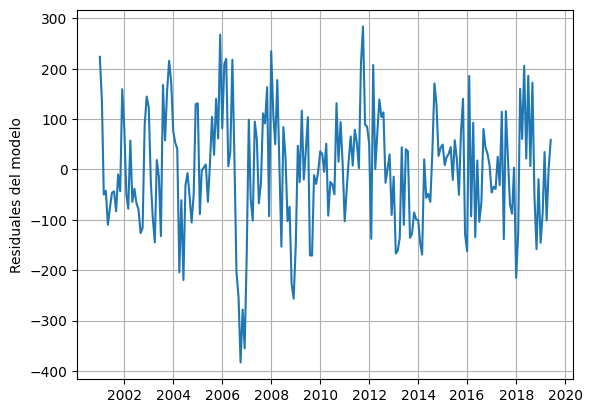

In [464]:
plt.ylabel("Residuales del modelo")
plt.plot(season_pol_2.resid)
plt.grid()

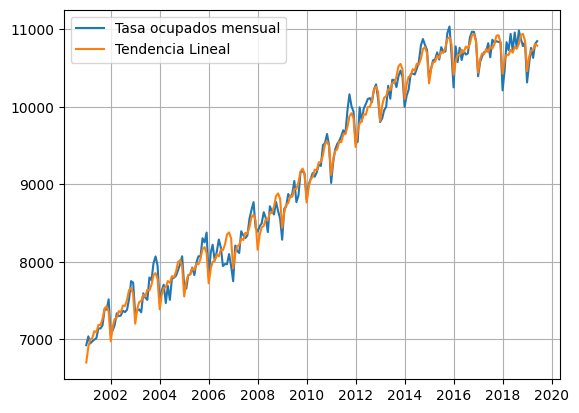

In [465]:
plt.plot(y,label="Tasa ocupados mensual")
plt.plot(season_pol_2.fittedvalues,label="Tendencia Lineal")
plt.legend()
plt.grid()
plt.show()

In [466]:
h=6
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)
x_for_all = pd.DataFrame(np.stack((x_for, x_for**2, x_for**3, x_for**4, x_for**5, x_for**6),axis=1),columns=["x","x2","x3","x4","x5","x6"] )
range_dates = pd.date_dates = pd.date_range(data.index[-1]+ relativedelta(months=1), periods=h,freq='MS')

x_for_dummies = pd.get_dummies(range_dates.month).astype(int)
x_for_dummies = x_for_dummies.reindex(columns=range(2, 13), fill_value=0)

X_for= sm.add_constant(pd.concat([x_for_all,x_for_dummies.astype(int)],axis=1))
X_for

,const,x,x2,x3,x4,x5,x6,2,3,4,5,6,7,8,9,10,11,12
0,1.0,223.0,49729.0,11089567.0,2.472973e+09,5.514731e+11,1.229785e+14,0,0,0,0,0,1,0,0,0,0,0
1,1.0,224.0,50176.0,11239424.0,2.517631e+09,5.639493e+11,1.263247e+14,0,0,0,0,0,0,1,0,0,0,0
2,1.0,225.0,50625.0,11390625.0,2.562891e+09,5.766504e+11,1.297463e+14,0,0,0,0,0,0,0,1,0,0,0
3,1.0,226.0,51076.0,11543176.0,2.608758e+09,5.895793e+11,1.332449e+14,0,0,0,0,0,0,0,0,1,0,0
4,1.0,227.0,51529.0,11697083.0,2.655238e+09,6.027390e+11,1.368218e+14,0,0,0,0,0,0,0,0,0,1,0
5,1.0,228.0,51984.0,11852352.0,2.702336e+09,6.161327e+11,1.404782e+14,0,0,0,0,0,0,0,0,0,0,1


In [467]:
dt = season_pol_2.get_prediction(X_for).summary_frame(alpha = 0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
preds = pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']
preds.set_index(range_dates,inplace=True)
print(preds)

            Point_forecast      lower_95      upper_95
2019-07-01    10878.359953  10609.639285  11147.080621
2019-08-01    10871.577210  10596.781648  11146.372773
2019-09-01    10951.616035  10669.617157  11233.614913
2019-10-01    11084.534508  10794.085438  11374.983578
2019-11-01    11119.688827  10819.426238  11419.951417
2019-12-01    11054.251697  10742.699813  11365.803581


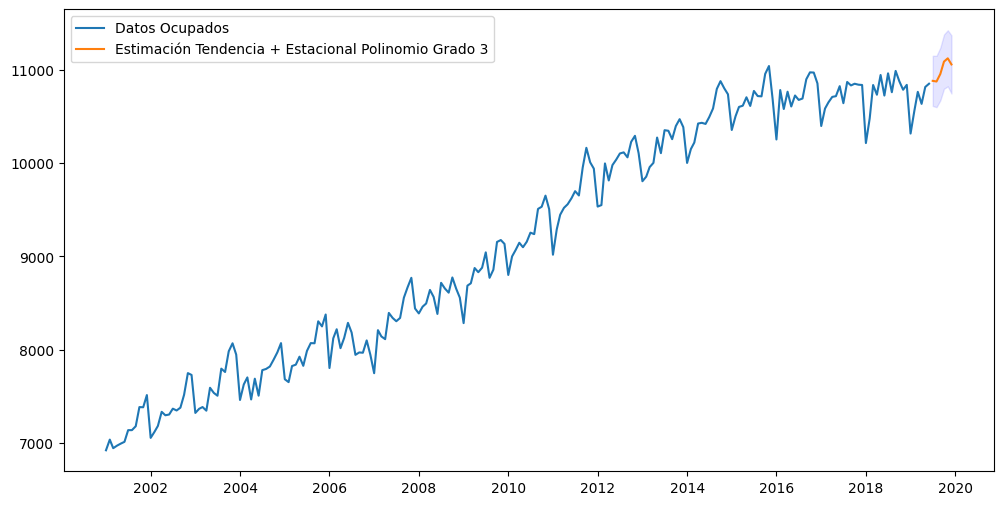

In [468]:
fig = plt.figure(figsize=(12, 6))
plt.plot(y.index,y,label="Datos Ocupados")
plt.plot(preds.index,preds['Point_forecast'],label="Estimación Tendencia + Estacional Polinomio Grado 3")
plt.fill_between(preds.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

**Ruido blanco**

In [469]:
season_pol_2.resid

,0
mes,
2001-01-01,223.606062
2001-02-01,137.719699
2001-03-01,-50.009155
2001-04-01,-42.195474
2001-05-01,-110.056889
...,...
2019-02-01,-86.418171
2019-03-01,34.607995
2019-04-01,-101.098530


In [470]:
signo = season_pol_2.resid>0
runstest_1samp(signo, correction=False)

(np.float64(-4.408993548144849), np.float64(1.0385211869970036e-05))

In [471]:
# prueba de Box-Pierce y la modificación de Ljung-Box
sm.stats.acorr_ljungbox(data.Ocupados, lags=[1], return_df=True,boxpierce=True ) # Se puede hacer para un solo lag.

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,215.466151,8.818153e-49,212.580444,3.757527e-48


In [472]:
Resul_lb_bp = sm.stats.acorr_ljungbox(data.Ocupados, lags=range(1,21), return_df=True,boxpierce=True )
Resul_lb_bp["lb_ho"] = np.where(Resul_lb_bp['lb_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')
Resul_lb_bp["bp_ho"] = np.where(Resul_lb_bp['bp_pvalue']<0.05, 'rechazo_ho/hay_autocorr', 'no_rechazo_ho/no_hay_autocorr')

Resul_lb_bp

,lb_stat,lb_pvalue,bp_stat,bp_pvalue,lb_ho,bp_ho
1,215.466151,8.818153e-49,212.580444,3.757527e-48,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
2,425.045838,5.040446e-93,418.417636,1.386005e-91,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
3,629.973395,3.201138e-136,618.770917,8.590288e-134,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
4,830.534686,1.866623e-178,813.960031,7.268819e-175,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
5,1028.006530,5.191558e-220,1005.260880,4.364213e-215,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
6,1222.035167,8.145806e-261,1192.359923,2.155332e-254,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
7,1412.841689,6.426069e-301,1375.500111,7.718370e-293,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
8,1599.512253,0.000000e+00,1553.837168,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
9,1782.749605,0.000000e+00,1728.076257,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
10,1963.258217,0.000000e+00,1898.914764,0.000000e+00,rechazo_ho/hay_autocorr,rechazo_ho/hay_autocorr
